# **17次元の変数で表されるデータを2次元で表現する（次元削減）**

TaSi<sub>17</sub>クラスターの構造異性体95種(EQ0～EQ94)に関するエネルギー(Energy)とTa-Si核間距離(R1～R17)のデータがcsvファイルにまとめられています。

17次元の変数で表されるクラスター構造の情報を「主成分分析(PCA)」を用いて2次元に削減し、95個のデータを2次元平面にプロットしましょう。

TaSi.csvファイルはこちらから取得できます。

https://drive.google.com/file/d/1mE_pZ--mWrJ0mPoUaKY4uABO4NmxiJ7C/view?usp=sharing



In [ ]:
#必要そうなライブラリたちをインポート（コピペすべし）
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

# **STEP1：データの読み込み**

In [ ]:
#csvファイルをアップロード
#左側の"ファイル"ボタンを押し、ファイルをdrag-and-dropしてもOK
#from google.colab import files
#files.upload()

In [ ]:
#csvファイルの中身を「df」に代入
## dfは"data frame"の略。
## pythonでは、data frameとarrayの2種類をよく使うので、どちらか混乱しないように、data frameにはdfと名前を付ける癖をつけるべし
df=pd.read_csv('TaSi17.csv')

# df_ML の中身を確認①
# 各列の名前やﾃﾞｰﾀの個数（ぬけがないか等々）をcheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EQ_ID   95 non-null     object 
 1   Energy  95 non-null     float64
 2   R1      95 non-null     float64
 3   R2      95 non-null     float64
 4   R3      95 non-null     float64
 5   R4      95 non-null     float64
 6   R5      95 non-null     float64
 7   R6      95 non-null     float64
 8   R7      95 non-null     float64
 9   R8      95 non-null     float64
 10  R9      95 non-null     float64
 11  R10     95 non-null     float64
 12  R11     95 non-null     float64
 13  R12     95 non-null     float64
 14  R13     95 non-null     float64
 15  R14     95 non-null     float64
 16  R15     95 non-null     float64
 17  R16     95 non-null     float64
 18  R17     95 non-null     float64
dtypes: float64(18), object(1)
memory usage: 14.2+ KB


In [ ]:
#dfの中身を確認②
# ﾃﾞｰﾀを上から4行だけ見てみる head(#) の#の数で表示する行数を指定
df.head(4)

,EQ_ID,Energy,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17
0,EQ0,-1.492153,2.01750,2.01752,2.03169,2.04463,2.04466,2.04477,2.04479,2.06911,2.06916,2.12788,2.12829,2.33559,2.33559,2.33581,2.33582,2.48710,2.48712
1,EQ1,-1.485933,1.98924,1.98925,1.99424,1.99426,2.00639,2.00641,2.09846,2.15598,2.16044,2.16335,2.26483,2.30243,2.30270,2.32711,2.32717,2.35960,2.35962
2,EQ2,-1.479658,1.99645,1.99647,2.05223,2.05227,2.05629,2.06886,2.06898,2.08557,2.08559,2.10080,2.17116,2.17191,2.17200,2.40545,2.41195,2.41196,2.61329
3,EQ3,-1.461869,2.06172,2.06174,2.07154,2.09176,2.09177,2.11258,2.11259,2.12170,2.13359,2.13360,2.14793,2.14797,2.15725,2.15725,2.16666,2.36348,2.73118


# **STEP2：dfのデータを切り分け**

In [ ]:
# dfの中のR1～R17をXに代入したい
# つまり、EQ_ID(構造の名前)とEnergyを削除すれば良い
# 削除したdfを別名に代入する前に、正しくデータを削除できているか確認
df.drop(columns=['EQ_ID','Energy']).head(2)
# df.iloc[:,2:].head(2)  行・列の数を指定して削除することも可(2列目以降をすべて取り出すという意味)

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17
0,2.01750,2.01752,2.03169,2.04463,2.04466,2.04477,2.04479,2.06911,2.06916,2.12788,2.12829,2.33559,2.33559,2.33581,2.33582,2.4871,2.48712
1,1.98924,1.98925,1.99424,1.99426,2.00639,2.00641,2.09846,2.15598,2.16044,2.16335,2.26483,2.30243,2.30270,2.32711,2.32717,2.3596,2.35962


In [ ]:
#核間距離(R1～R17)のみを取り出して、"df_dist"というデータフレームに代入
df_dist=df.drop(columns=['EQ_ID','Energy'])

#df_distの中身を確認
# ﾃﾞｰﾀを上から2行だけ見てみる
df_dist.head(2)

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17
0,2.01750,2.01752,2.03169,2.04463,2.04466,2.04477,2.04479,2.06911,2.06916,2.12788,2.12829,2.33559,2.33559,2.33581,2.33582,2.4871,2.48712
1,1.98924,1.98925,1.99424,1.99426,2.00639,2.00641,2.09846,2.15598,2.16044,2.16335,2.26483,2.30243,2.30270,2.32711,2.32717,2.3596,2.35962


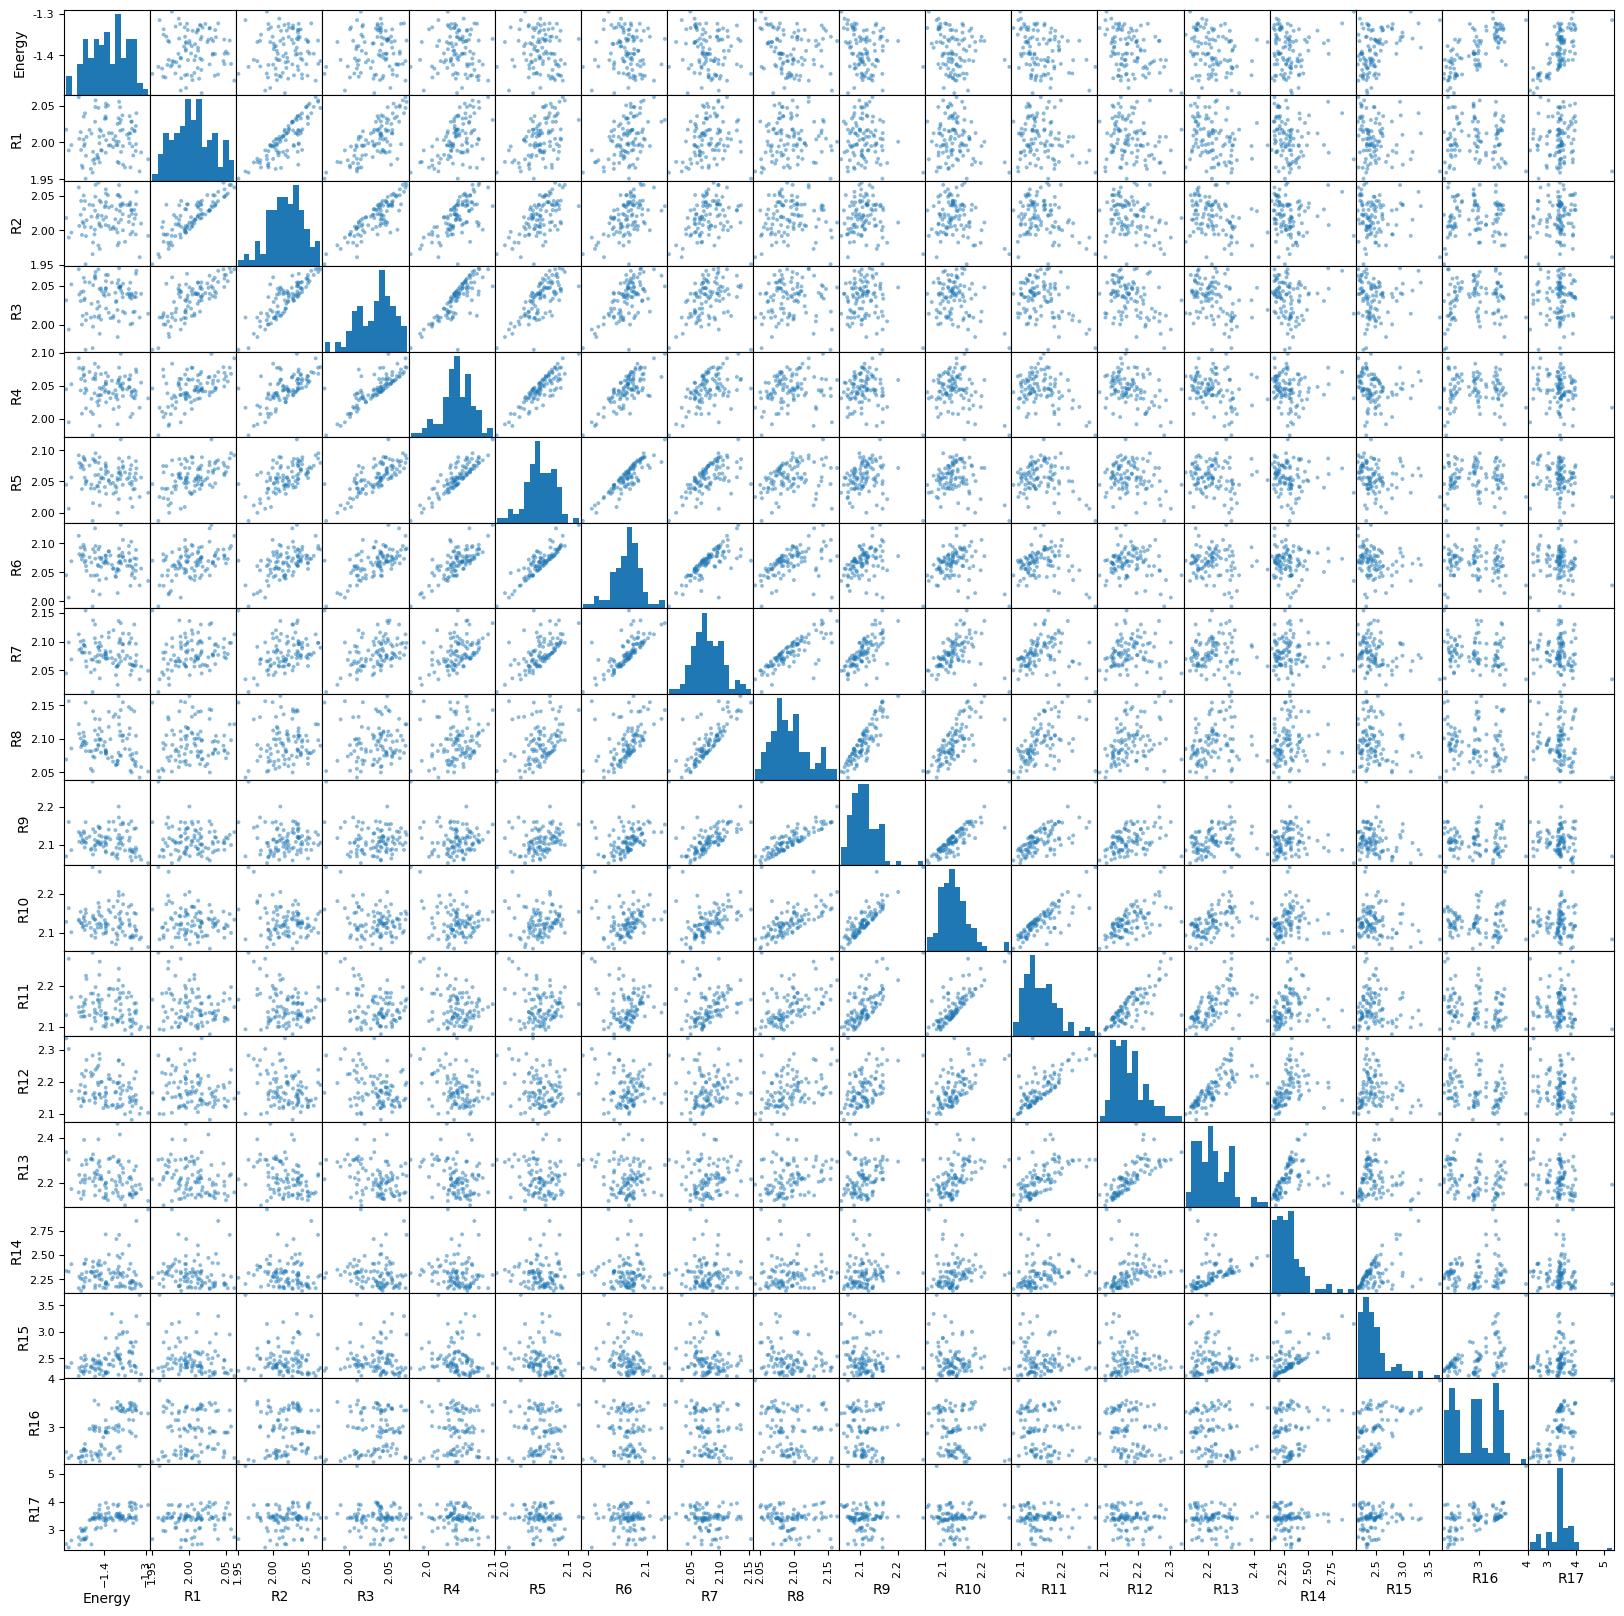

In [ ]:
# データの分散具合を見てみる：その１
df_AllData = df.drop(columns='EQ_ID')  #構造名以外の全データを取り出す

pd.plotting.scatter_matrix(df_AllData, figsize=(20, 20), hist_kwds={'bins':15},
                           marker=('o'), s=8, alpha=.5)
plt.show()

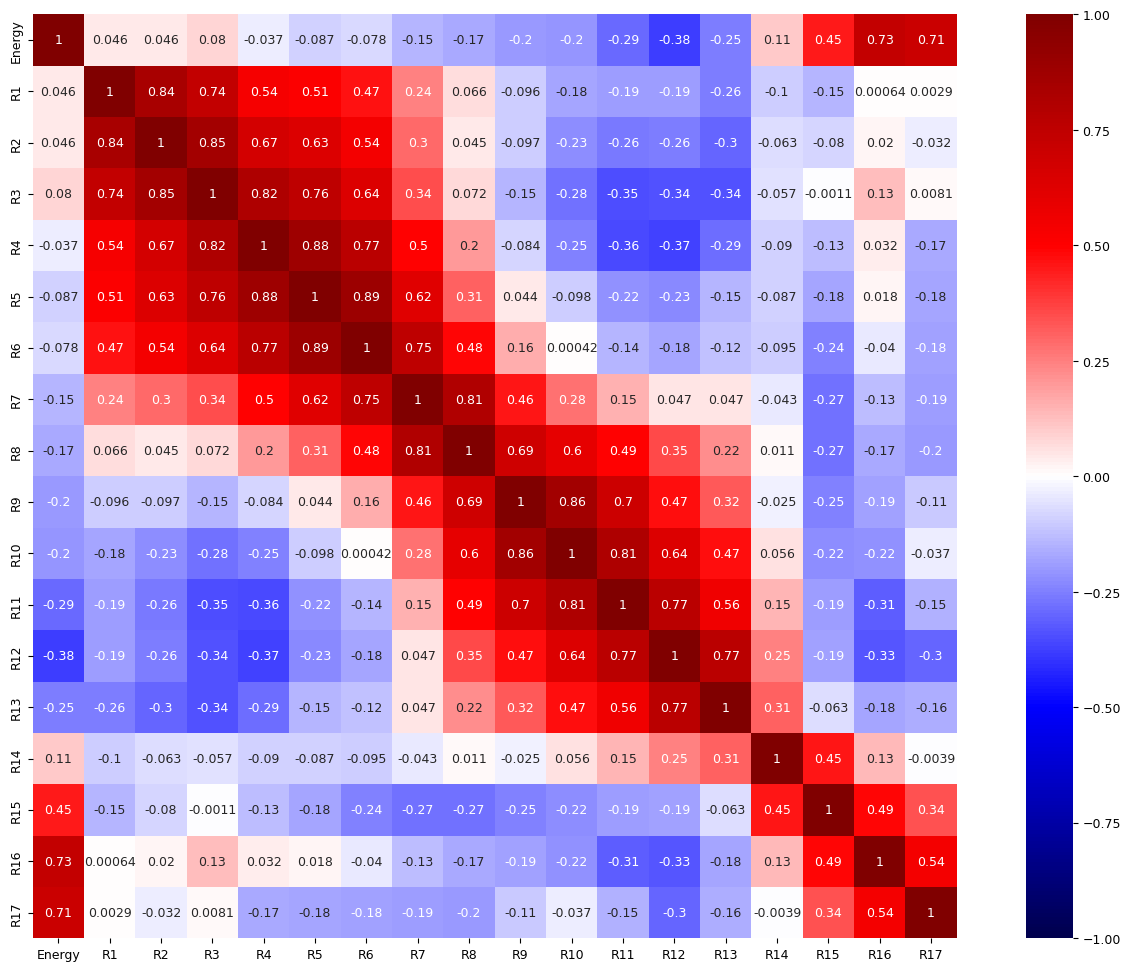

In [ ]:
# データの分散具合を見る：その２：相関行列
correlation_coefficients = df_AllData.corr()  # 相関行列の計算
# 相関行列のヒートマップ (相関係数の値あり)
plt.rcParams['font.size'] = 9
plt.figure(figsize=(18, 12))  # この段階で画像のサイズを指定する
sns.heatmap(correlation_coefficients, vmax=1, vmin=-1, cmap='seismic', square=True, annot=True, xticklabels=1, yticklabels=1)
plt.xlim([0, correlation_coefficients.shape[0]])
plt.show()

(memo1)
多重共線性が心配な場合は、説明変数を削るのもアリ（今回は必要なし）

(memo2)
分散が0の変数（一定値しかとらない変数）は特徴量として意味をなさないので削る

# **STEP3：PCAによる次元圧縮**

In [ ]:
from sklearn.decomposition import PCA  # PCA用ライブラリをインポート
# k次元に圧縮したい場合、n_components = k と指定する。
pca = PCA(n_components=2, random_state=10)
pca.fit(df_dist)

PCA(n_components=2, random_state=10)

In [ ]:
# 寄与率（表現できる情報量の割合）を計算する
contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_)
contribution_ratios

,0
0,0.626037
1,0.188912


In [ ]:
#ローディングベクトルを表示する
#第一主成分は(0.672)×(R17) + (0.667)×(R16) + (0.312)×(R15) +…   で構成されていることが読み取れる
loadings = pd.DataFrame(pca.components_.T, index=df_dist.columns)
loadings

,0,1
R1,-0.001049,0.006240
R2,-0.000837,-0.000841
R3,0.002909,-0.005820
R4,-0.003799,-0.010028
R5,-0.004749,-0.008687
R6,-0.006807,-0.003715
R7,-0.010022,0.001050
R8,-0.012296,0.002731
R9,-0.012298,0.014795
R10,-0.011553,0.025421


In [ ]:
# score(主成分得点)は各サンプルが各主成分軸上のどの座標に位置するかを表す値
score = pd.DataFrame(pca.transform(df_dist), index=df_dist.index)
score

,0,1
0,-0.938564,-0.366047
1,-1.115884,-0.381078
2,-0.869114,-0.281912
3,-0.910133,-0.017615
4,-1.028516,-0.306437
...,...,...
90,0.358599,-0.118910
91,0.550599,-0.692337
92,2.363365,0.327281
93,0.469380,0.286779


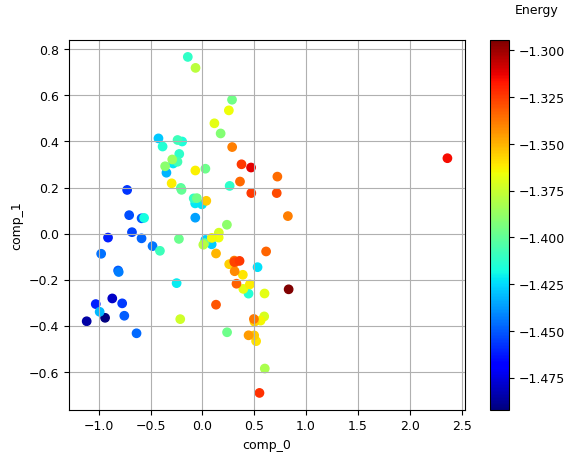

In [ ]:
# 第 1 主成分と第 2 主成分の散布図 (energy の値でサンプルに色付け)
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=df['Energy'], cmap=plt.get_cmap('jet'))
clb = plt.colorbar()
clb.set_label('Energy', labelpad=-20, y=1.1, rotation=0)
#plt.xlim(-1.5, 2.5)
#plt.ylim(-1.0, 1.0)
plt.xlabel('comp_0')
plt.ylabel('comp_1')
plt.grid()
plt.show()

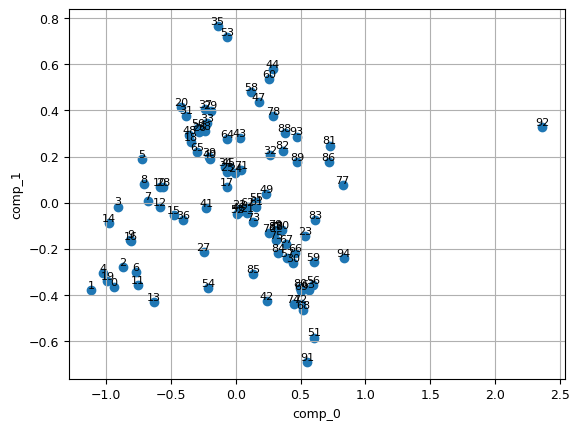

In [ ]:
num = len(df_dist)  # 可視化するデータ数(＝行数)を指定
plt.scatter(score.iloc[:,0], score.iloc[:,1])
plt.rcParams["font.size"] = 8
# プロットしたデータにサンプル名をラベリング
for i in range(num):
    plt.text(score.iloc[i,0], score.iloc[i,1], score.index[i], horizontalalignment="center", verticalalignment="bottom")
#plt.xlim(-1.5, 2.5)
#plt.ylim(-1.0, 1.0)
plt.xlabel("comp_0")
plt.ylabel("comp_1")
plt.grid()
plt.show()

In [ ]:
#おまけ
#せっかくなので、comp_0, comp_1を説明変数とした重回帰分析もしてみる（主成分回帰（Principal Component Regression, PCR）)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
X = score.iloc[:,:]
Y = df['Energy']
model.fit(X, Y)

# 決定係数
print("R^2=",model.score(X,Y))
# 回帰係数
print(model.coef_)

R^2= 0.6724212850052516
[0.06874012 0.00190528]
